In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [118]:
df = pd.read_csv(Path('Resources/application_train.csv'))

In [119]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150494,274461,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
150495,274462,0,Cash loans,F,N,Y,1,148500.0,427500.0,33772.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
150496,274463,0,Cash loans,F,N,Y,0,202500.0,986782.5,53662.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
150497,274464,0,Cash loans,M,Y,Y,0,157500.0,639387.0,34686.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150499 entries, 0 to 150498
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 140.1+ MB


In [121]:
clean_df = df.dropna(axis=1)

In [122]:
len(clean_df[clean_df['FLAG_DOCUMENT_13'] == 0])

149971

In [123]:
len(clean_df[clean_df['FLAG_DOCUMENT_13'] == 1])

528

In [124]:
clean_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150494,274461,0,Revolving loans,F,N,N,0,90000.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
150495,274462,0,Cash loans,F,N,Y,1,148500.0,427500.0,Working,...,0,0,0,0,0,0,0,0,0,0
150496,274463,0,Cash loans,F,N,Y,0,202500.0,986782.5,Commercial associate,...,0,0,0,0,0,0,0,0,0,0
150497,274464,0,Cash loans,M,Y,Y,0,157500.0,639387.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [125]:
clean_df.shape

(150499, 55)

In [126]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150499 entries, 0 to 150498
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   150499 non-null  int64  
 1   TARGET                       150499 non-null  int64  
 2   NAME_CONTRACT_TYPE           150499 non-null  object 
 3   CODE_GENDER                  150499 non-null  object 
 4   FLAG_OWN_CAR                 150499 non-null  object 
 5   FLAG_OWN_REALTY              150499 non-null  object 
 6   CNT_CHILDREN                 150499 non-null  int64  
 7   AMT_INCOME_TOTAL             150499 non-null  float64
 8   AMT_CREDIT                   150499 non-null  float64
 9   NAME_INCOME_TYPE             150499 non-null  object 
 10  NAME_EDUCATION_TYPE          150499 non-null  object 
 11  NAME_FAMILY_STATUS           150499 non-null  object 
 12  NAME_HOUSING_TYPE            150499 non-null  object 
 13 

In [131]:
# Drop some unimportant columns
clean_df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',\
               'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',\
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',\
               'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis=1, inplace=True)

In [133]:
clean_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,2,THURSDAY,11,0,0,0,0,1,1,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150494,274461,0,Revolving loans,F,N,N,0,90000.0,135000.0,Working,...,2,THURSDAY,15,0,0,0,0,0,0,Trade: type 3
150495,274462,0,Cash loans,F,N,Y,1,148500.0,427500.0,Working,...,1,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 3
150496,274463,0,Cash loans,F,N,Y,0,202500.0,986782.5,Commercial associate,...,2,WEDNESDAY,8,0,0,0,0,0,0,Business Entity Type 3
150497,274464,0,Cash loans,M,Y,Y,0,157500.0,639387.0,Working,...,2,THURSDAY,4,0,0,0,0,0,0,Self-employed


In [134]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150499 entries, 0 to 150498
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   150499 non-null  int64  
 1   TARGET                       150499 non-null  int64  
 2   NAME_CONTRACT_TYPE           150499 non-null  object 
 3   CODE_GENDER                  150499 non-null  object 
 4   FLAG_OWN_CAR                 150499 non-null  object 
 5   FLAG_OWN_REALTY              150499 non-null  object 
 6   CNT_CHILDREN                 150499 non-null  int64  
 7   AMT_INCOME_TOTAL             150499 non-null  float64
 8   AMT_CREDIT                   150499 non-null  float64
 9   NAME_INCOME_TYPE             150499 non-null  object 
 10  NAME_EDUCATION_TYPE          150499 non-null  object 
 11  NAME_FAMILY_STATUS           150499 non-null  object 
 12  NAME_HOUSING_TYPE            150499 non-null  object 
 13 

In [135]:
# Convert categorical data to numeric and separate target feature for training data
X=clean_df.drop('TARGET',axis=1)
X_dummies =pd.get_dummies(X)

y=clean_df['TARGET']
y_dummies=LabelEncoder().fit_transform(y)

In [136]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
# summarize class distribution
counter = Counter(y_dummies)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X_dummies, y_dummies)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 138207, 1: 12292})
Counter({0: 12292, 1: 12292})


In [137]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

# Using Unscaled Data

In [138]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier= LogisticRegression().fit(X_train,y_train)

print('Logisitc Regression - Unscaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test, y_test)}')

Logisitc Regression - Unscaled Data
------------------------------------
Training Data Score: 0.6386809849224427
Testing Data Score: 0.6324438659290595


In [139]:
# Train a Random Forest Classifier model and print the model score
classifier=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_train,y_train)

print('Random Forest Classifier - Unscaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test, y_test)}')

Random Forest Classifier - Unscaled Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7570777741620566


# Using Scaled Data

In [140]:
# Scale the data
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [141]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier= LogisticRegression(max_iter=5000,solver='lbfgs').fit(X_train_scaled,y_train)

print('Logisitc Regression - Scaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test_scaled, y_test)}')

Logisitc Regression - Scaled Data
------------------------------------
Training Data Score: 0.686625447445493
Testing Data Score: 0.6923202082655385


In [142]:
# Train a Random Forest Classifier model on the scaled data and print the model score
classifier=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_train_scaled,y_train)

print('Random Forest Classifier - Scaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test_scaled, y_test)}')

Random Forest Classifier - Scaled Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7567523592580541


# Feature Selection

In [143]:
feature_importances = classifier.feature_importances_

In [144]:
from matplotlib import pyplot as plt

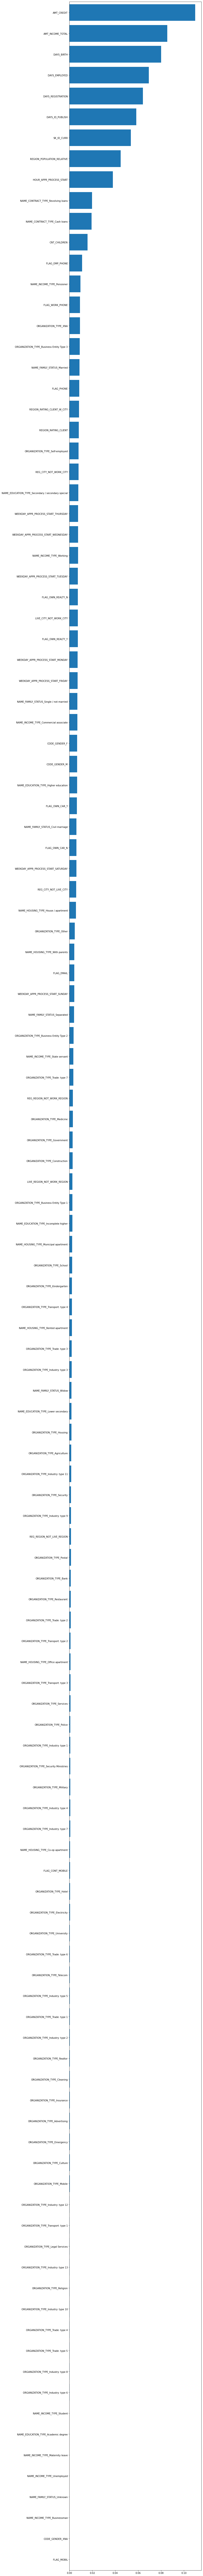

In [145]:
features = sorted(zip(X.columns, classifier.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [146]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(classifier)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [147]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [148]:
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.6735003796507213
Testing Score: 0.6784900748454279


In [149]:
clf=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_selected_train_scaled,y_train)

print('Random Forest Classifier - Feature Selected Data')
print("------------------------------------")
print(f'Training Data Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Data Score: {clf.score(X_selected_test_scaled, y_test)}')

Random Forest Classifier - Feature Selected Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7676537585421412
